<a href="https://colab.research.google.com/github/bhargav-borah/car-price-prediction-linear-lasso/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

## Importing dependencies

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics

## Importing the dataset

In [72]:
car_dataset = pd.read_csv('car data.csv')

## Exploring the dataset

In [73]:
car_dataset.shape

(301, 9)

In [74]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [75]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [76]:
car_dataset['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [77]:
car_dataset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [78]:
car_dataset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [79]:
car_dataset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [80]:
car_dataset['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [81]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [82]:
car_dataset.duplicated().sum()

2

In [83]:
car_dataset[car_dataset.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [84]:
car_dataset = car_dataset.drop_duplicates()

In [85]:
car_dataset.duplicated().sum()

0

In [86]:
car_dataset.shape

(299, 9)

In [87]:
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2013.615385,4.589632,7.541037,36916.752508,0.043478
std,2.896868,4.984240,8.567887,39015.170352,0.248720
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.850000,1.200000,15000.000000,0.000000
50%,2014.000000,3.510000,6.100000,32000.000000,0.000000
75%,2016.000000,6.000000,9.840000,48883.500000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


## Data Preprocessing

In [88]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       299 non-null    object 
 1   Year           299 non-null    int64  
 2   Selling_Price  299 non-null    float64
 3   Present_Price  299 non-null    float64
 4   Kms_Driven     299 non-null    int64  
 5   Fuel_Type      299 non-null    object 
 6   Seller_Type    299 non-null    object 
 7   Transmission   299 non-null    object 
 8   Owner          299 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 23.4+ KB


In [89]:
car_dataset.Transmission.value_counts()

Manual       260
Automatic     39
Name: Transmission, dtype: int64

### Encoding Categorical Data

In [90]:
car_dataset.replace({'Fuel_Type' : {'Petrol':0, 'Diesel':1, 'CNG':2},
                                   'Seller_Type' : {'Dealer':0, 'Individual':1},
                                   'Transmission' : {'Manual':0, 'Automatic':1}}, inplace=True)

<ipython-input-90-83f1b2c11f1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car_dataset.replace({'Fuel_Type' : {'Petrol':0, 'Diesel':1, 'CNG':2},


In [91]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


## Splitting the features and labels

In [92]:
X = car_dataset.drop(columns=['Car_Name', 'Selling_Price'])
y = car_dataset['Selling_Price']

In [93]:
X.shape

(299, 7)

In [94]:
y.shape

(299,)

In [95]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

## Splitting the dataset into training set and test set

In [96]:
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

## Model Training - Linear Regression

In [97]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

### Evaluation on Training Set

In [98]:
y_pred_train = regressor.predict(X_train)
print('R-squared Error = ', metrics.r2_score(y_train, y_pred_train))

R-squared Error =  0.8771123681040547


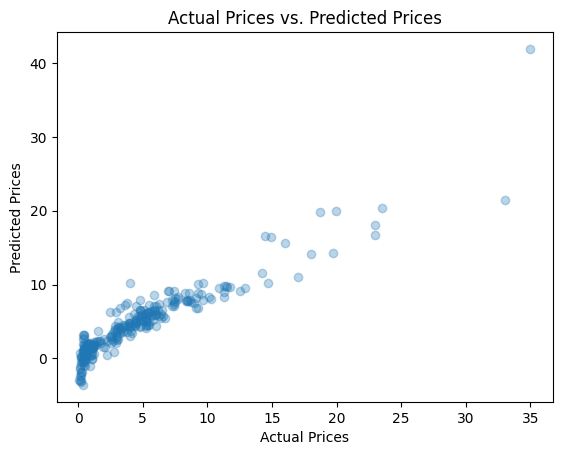

In [99]:
plt.scatter(y_train, y_pred_train, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### Evaluation on Test Set

In [100]:
y_pred_test = regressor.predict(X_test)
print('R-squared Error = ', metrics.r2_score(y_test, y_pred_test))

R-squared Error =  0.8562516649197174


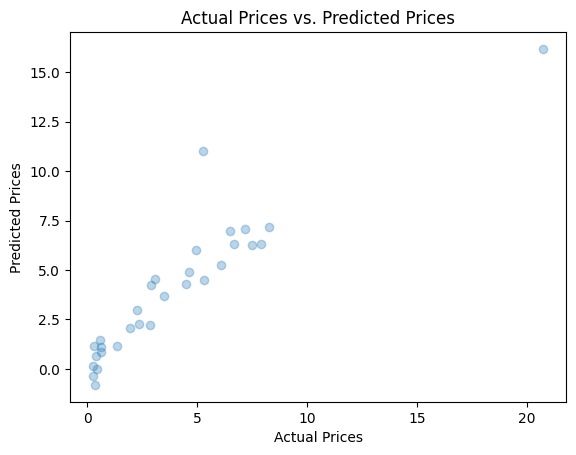

In [101]:
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

## Model Training - Lasso Regression

In [102]:
reg = Lasso()
reg.fit(X_train, y_train)

Lasso()

## Model Evaluation

### Evaluation on Training Set

In [103]:
y_pred_train = reg.predict(X_train)
print('R-squared Error = ', metrics.r2_score(y_train, y_pred_train))

R-squared Error =  0.8428090658179708


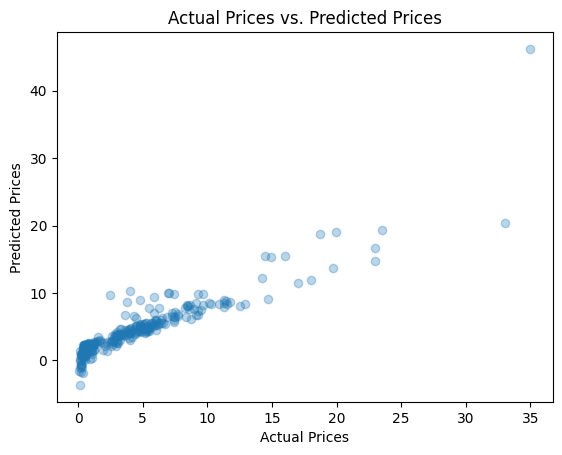

In [104]:
plt.scatter(y_train, y_pred_train, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()

### Evaluation on Test Set

In [105]:
y_pred_test = reg.predict(X_test)
print('R-squared Error = ', metrics.r2_score(y_test, y_pred_test))

R-squared Error =  0.7933398240755692


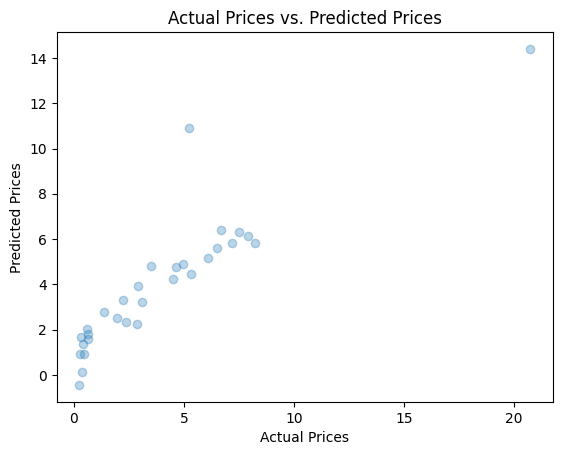

In [106]:
plt.scatter(y_test, y_pred_test, alpha=0.3)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()